# Map绘制
基于basemap  
https://matplotlib.org/basemap/

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import os
os.environ['PROJ_LIB'] = '/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/share/proj' # 对于jupyter 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import shapefile
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# 在jupyter中显示图片
%matplotlib inline

In [2]:
y_pred = np.load('res_10.npy') * 1000
y_true = np.load('cmaq_10.npy') * 1000
species = ['NO2', 'NO', 'O3', 'H2O2', 'ROOH', 'ETHENE', 'ETHANE', '·OH', 'HO2·','RO2·']
maxlist = [ 40,  30,  70,    3,   0.2,     6,      6,   6e-04,  1.2e-02,    0.03]     
steplist = [ 4,   3,   7,  0.3,  0.02,   0.6,    0.6,   6e-05,  1.2e-03,    0.003]

## 1.浓度分布图

/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


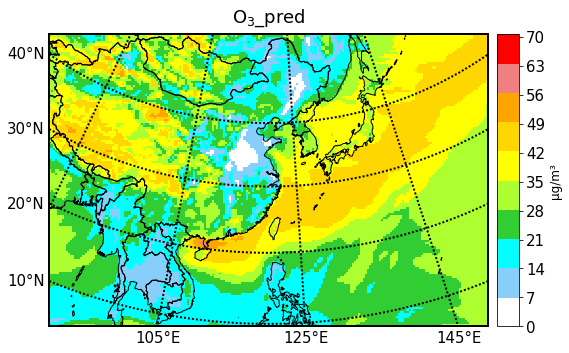

In [3]:
def plot_map(data, time, i, max, step):
    grid_file = Dataset('GRIDCRO2D_CHINA_36km_2016001.nc')
    lon = grid_file.variables['LON'][0,0,:,:]
    lat = grid_file.variables['LAT'][0,0,:,:]
    fig = plt.figure(figsize=(8,6))
    ax = fig.subplots()
    norm = mpl.colors.Normalize(0, vmax=max[i]+step[i]/10)    
    color_list = ('white','lightskyblue','cyan','limegreen','greenyellow','yellow','gold','orange','lightcoral','red') 
    cmap = mpl.colors.ListedColormap(color_list, name='plotmap')
    bounds = [x for x in np.arange(0, max[i]+step[i]/100, step[i])]
    #m = Basemap(llcrnrx=-540000, llcrnry=-540000, urcrnrx=396000, urcrnry=540000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 12km
    m = Basemap(llcrnrx=-3780000, llcrnry=-2520000, urcrnrx=3780000, urcrnry=2520000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 36km
    file = 'china_shapefiles_master/country1'
    m.readshapefile(file, 'states', drawbounds=True, linewidth=1)
    parallels = np.arange(10, 50, 10)
    m.drawparallels(parallels, textcolor='black', labels=[1, 0, 0, 0], linewidth=2, fontsize=15)
    meridians = np.arange(85, 165, 20)
    m.drawmeridians(meridians, textcolor='black', labels=[0, 0, 0, 1], linewidth=2, fontsize=15)    
    p = m.imshow(data[time, :, :, i], cmap=cmap, norm=norm, interpolation='none')
    #p = m.contourf(lon, lat, data[time,:,:,i], levels=np.arange(min[i]-step[i]/100, max[i]+step[i]/100, step[i]), cmap=cmap, latlon=True, extend='both')
    p.cmap.set_over(color='firebrick')
    p.cmap.set_under(color='blue')   
    #file = 'china_shapefiles_master/bou2_4l'
    #m.readshapefile(file, 'states', drawbounds=True, linewidth=0.3)
    ax.set_title('$\mathregular{O_3}$_pred', loc='center', y=1.02, fontweight='normal', fontsize=18)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    clb = m.colorbar(p, ticks=bounds, format='%d')
    clb.ax.tick_params(labelsize=15)
    clb.set_label('μg/m\N{SUPERSCRIPT THREE}', fontsize=12) 
    fig.tight_layout()
    plt.savefig('o3_basemap.png', bbox_inches='tight', dpi=300) 
    plt.show()
    plt.close()
    return


time = 0
i = 2
plot_map(y_pred, time, i, maxlist, steplist)  

/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


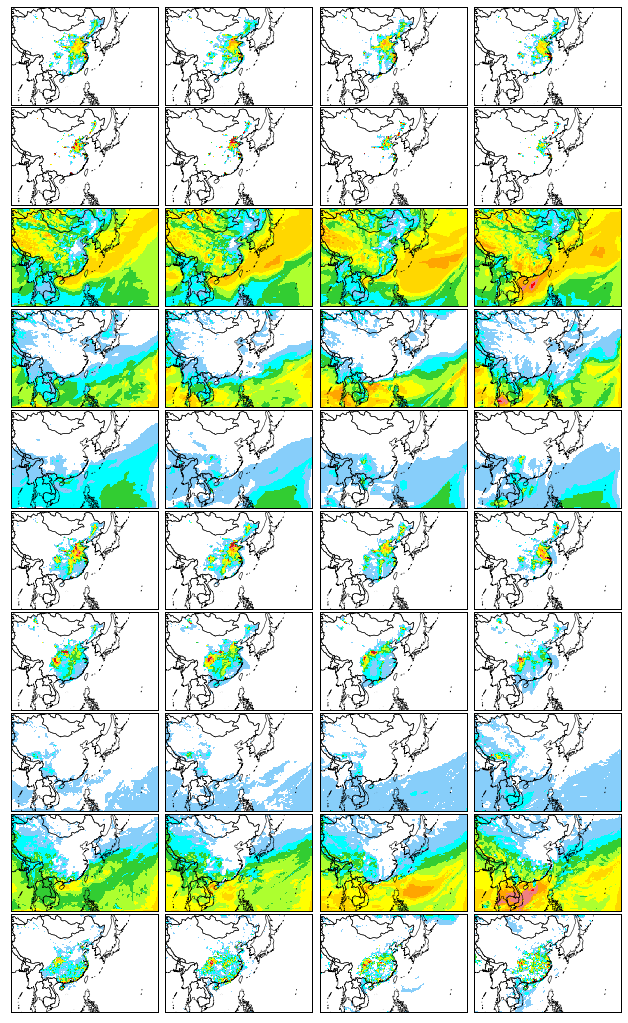

In [4]:
# 多图，第1、4、7、10天
def plot_map_n(data, time, i, max, step, count):
    grid_file = Dataset('GRIDCRO2D_CHINA_36km_2016001.nc')
    lon = grid_file.variables['LON'][0,0,:,:]
    lat = grid_file.variables['LAT'][0,0,:,:]
    ax = fig.add_subplot(10, 4, count, adjustable='box')
    norm = mpl.colors.Normalize(0, vmax=max[i]+step[i]/10)    
    color_list = ('white','lightskyblue','cyan','limegreen','greenyellow','yellow','gold','orange','lightcoral','red') 
    cmap = mpl.colors.ListedColormap(color_list, name='plotmap')
    bounds = [x for x in np.arange(0, max[i]+step[i]/100, step[i])]
    #m = Basemap(llcrnrx=-540000, llcrnry=-540000, urcrnrx=396000, urcrnry=540000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 12km
    m = Basemap(llcrnrx=-3780000, llcrnry=-2520000, urcrnrx=3780000, urcrnry=2520000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 36km
    file = 'china_shapefiles_master/country1'
    m.readshapefile(file, 'states', drawbounds=True, linewidth=0.5)
    #parallels = np.arange(10, 50, 10)
    #m.drawparallels(parallels, textcolor='black', labels=[1, 0, 0, 0], linewidth=2, fontsize=15)
    #meridians = np.arange(85, 165, 20)
    #m.drawmeridians(meridians, textcolor='black', labels=[0, 0, 0, 1], linewidth=2, fontsize=15)   
    p = m.imshow(data[time, :, :, i], cmap=cmap, norm=norm, interpolation='none')
    #p = m.contourf(lon, lat, data[time,:,:,i], levels=np.arange(min[i]-step[i]/100, max[i]+step[i]/100, step[i]), cmap=cmap, latlon=True, extend='both')
    p.cmap.set_over(color='firebrick')
    p.cmap.set_under(color='blue')   
    #file = 'china_shapefiles_master/bou2_4l'
    #m.readshapefile(file, 'states', drawbounds=True, linewidth=0.3)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    return


fig = plt.figure(figsize=(11, 18.5))
num = [0, 6, 14, 29]
count = 1
for i in range(10):
    for d in num:
        plot_map_n(y_pred, d, i, maxlist, steplist, count) 
        count += 1
fig.subplots_adjust(wspace=0.03, hspace=0.03)
plt.savefig('ten_species_basemap.png', bbox_inches='tight', dpi=300) 
plt.show()
plt.close()

## 2. 仅绘制中国区域

In [5]:
# 实现对中国区域切片
def shp2clip(originfig,ax,m,shpfile,region):
    sf = shapefile.Reader(shpfile, encoding='GB2312')
    vertices = []
    codes = []
    for shape_rec in sf.shapeRecords():
        # 这里需要找到和region匹配的唯一标识符，record[]中必有一项是对应的。
        # if shape_rec.record[3] == region:   # 在country1.shp上，对中国以外的其他国家或地区进行maskout
        if shape_rec.record[3] in region:  # 在bou2_4p.shp上，对中国的某几个省份或地区之外的部分进行maskout
            pts = shape_rec.shape.points
            prt = list(shape_rec.shape.parts) + [len(pts)]
            for i in range(len(prt) - 1):
                for j in range(prt[i], prt[i+1]):
                    vertices.append(m(pts[j][0], pts[j][1]))
                codes += [Path.MOVETO]
                codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
                codes += [Path.CLOSEPOLY]
            clip = Path(vertices, codes)
            clip = PathPatch(clip, transform=ax.transData)
    for contour in originfig.collections:
        contour.set_clip_path(clip)
    return clip

/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


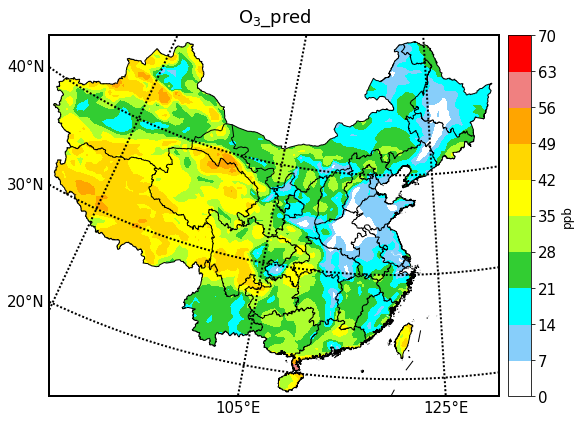

In [6]:
def plot_map(data, time, i, max, step):
    grid_file = Dataset('GRIDCRO2D_CHINA_36km_2016001.nc')
    lon = grid_file.variables['LON'][0,0,:,:]
    lat = grid_file.variables['LAT'][0,0,:,:]
    fig = plt.figure(figsize=(8,6))
    ax = fig.subplots()
    norm = mpl.colors.Normalize(0, vmax=max[i]+step[i]/10)    
    color_list = ('white','lightskyblue','cyan','limegreen','greenyellow','yellow','gold','orange','lightcoral','red') 
    cmap = mpl.colors.ListedColormap(color_list, name='plotmap')
    bounds = [x for x in np.arange(0, max[i]+step[i]/100, step[i])]
    #m = Basemap(llcrnrx=-540000, llcrnry=-540000, urcrnrx=396000, urcrnry=540000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 12km
    #m = Basemap(llcrnrx=-3780000, llcrnry=-2520000, urcrnrx=3780000, urcrnry=2520000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 36km
    m = Basemap(llcrnrx=-3780000, llcrnry=-1440000, urcrnrx=1152000, urcrnry=2520000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 中国陆地区域
    file1 = 'china_shapefiles_master/country1'
    m.readshapefile(file1, 'states', drawbounds=False, linewidth=1)
    parallels = np.arange(10, 50, 10)
    m.drawparallels(parallels, textcolor='black', labels=[1, 0, 0, 0], linewidth=2, fontsize=15)
    meridians = np.arange(85, 165, 20)
    m.drawmeridians(meridians, textcolor='black', labels=[0, 0, 0, 1], linewidth=2, fontsize=15)    
    #p = m.imshow(data[time, :, :, i], cmap=cmap, norm=norm, interpolation='none') # 暂不支持imshow
    p = m.contourf(lon, lat, data[time,:,:,i], levels=np.arange(0, max[i]+step[i]/100, step[i]), cmap=cmap, latlon=True, extend='neither')
    #p.cmap.set_over(color='firebrick')
    #p.cmap.set_under(color='blue')
    clip = shp2clip(p, ax, m, file1, 'China')
    file2 = 'china_shapefiles_master/bou2_4l'
    m.readshapefile(file2, 'states', drawbounds=True, linewidth=1)
    ax.set_title('$\mathregular{O_3}$_pred', loc='center', y=1.02, fontweight='normal', fontsize=18)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    clb = m.colorbar(p, ticks=bounds, format='%d')
    clb.ax.tick_params(labelsize=15)
    #clb.set_label('μg/m\N{SUPERSCRIPT THREE}', fontsize=12) 
    clb.set_label('ppb', fontsize=12) 
    fig.tight_layout()
    plt.savefig('o3_Chinese_Mainland.png', bbox_inches='tight', dpi=300) 
    plt.show()
    plt.close()
    return


time = 0
i = 2
plot_map(y_pred, time, i, maxlist, steplist)  

## 3. 添加南海小地图

/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  from ipykernel import kernelapp as app
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The dedent f

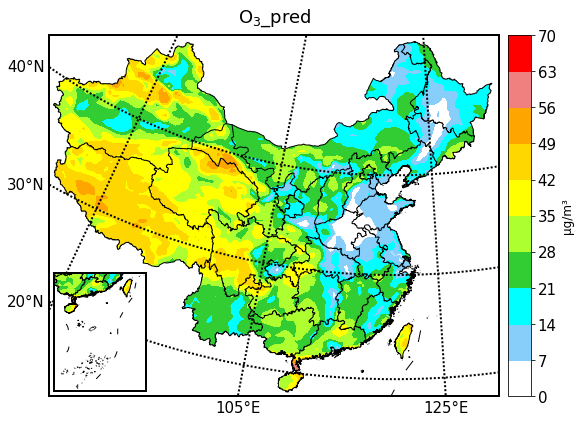

In [7]:
def plot_map(data, time, i, max, step):
    grid_file = Dataset('GRIDCRO2D_CHINA_36km_2016001.nc')
    lon = grid_file.variables['LON'][0,0,:,:]
    lat = grid_file.variables['LAT'][0,0,:,:]
    fig = plt.figure(figsize=(8,6))
    ax = fig.subplots()
    norm = mpl.colors.Normalize(0, vmax=max[i]+step[i]/10)    
    color_list = ('white','lightskyblue','cyan','limegreen','greenyellow','yellow','gold','orange','lightcoral','red') 
    cmap = mpl.colors.ListedColormap(color_list, name='plotmap')
    bounds = [x for x in np.arange(0, max[i]+step[i]/100, step[i])]
    #m = Basemap(llcrnrx=-540000, llcrnry=-540000, urcrnrx=396000, urcrnry=540000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 12km
    #m = Basemap(llcrnrx=-3780000, llcrnry=-2520000, urcrnrx=3780000, urcrnry=2520000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 36km
    m = Basemap(llcrnrx=-3780000, llcrnry=-1440000, urcrnrx=1152000, urcrnry=2520000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) # 中国陆地区域
    file1 = 'china_shapefiles_master/country1'
    m.readshapefile(file1, 'states', drawbounds=False, linewidth=1)
    parallels = np.arange(10, 50, 10)
    m.drawparallels(parallels, textcolor='black', labels=[1, 0, 0, 0], linewidth=2, fontsize=15)
    meridians = np.arange(85, 165, 20)
    m.drawmeridians(meridians, textcolor='black', labels=[0, 0, 0, 1], linewidth=2, fontsize=15)    
    #p = m.imshow(data[time, :, :, i], cmap=cmap, norm=norm, interpolation='none') # 暂不支持imshow
    p = m.contourf(lon, lat, data[time,:,:,i], levels=np.arange(0, max[i]+step[i]/100, step[i]), cmap=cmap, latlon=True, extend='neither')
    #p.cmap.set_over(color='firebrick')
    #p.cmap.set_under(color='blue')
    clip = shp2clip(p, ax, m, file1, 'China')
    file2 = 'china_shapefiles_master/bou2_4l'
    m.readshapefile(file2, 'states', drawbounds=True, linewidth=1)
    ax.set_title('$\mathregular{O_3}$_pred', loc='center', y=1.02, fontweight='normal', fontsize=18)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['right'].set_linewidth(2)
    clb = m.colorbar(p, ticks=bounds, format='%d')
    clb.ax.tick_params(labelsize=15)
    clb.set_label('μg/m\N{SUPERSCRIPT THREE}', fontsize=12) 
    
    # 绘制南海地图
    axins = zoomed_inset_axes(ax, 0.5, loc = 3)
    axins.spines['bottom'].set_linewidth(2)
    axins.spines['left'].set_linewidth(2)
    axins.spines['top'].set_linewidth(2)
    axins.spines['right'].set_linewidth(2)  
    m2 = Basemap(llcrnrx=-1500000, llcrnry=-3100000, urcrnrx=500000, urcrnry=-500000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120) 
    m2.readshapefile(file1, 'states', drawbounds=False, linewidth=1)
    m2.readshapefile(file2, 'states', drawbounds=True, linewidth=1)
    p2 = m2.contourf(lon, lat, data[time,:,:,i], levels=np.arange(0, max[i]+step[i]/100, step[i]), cmap=cmap, latlon=True, extend='neither')
    clip2 = shp2clip(p2, axins, m2, file1, 'China')
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="none")   
    
    fig.tight_layout()
    plt.savefig('o3_add_nanhai.png', bbox_inches='tight', dpi=300) 
    plt.show()
    plt.close()
    return


time = 0
i = 2
plot_map(y_pred, time, i, maxlist, steplist)  

## 4. 风向绘制

/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


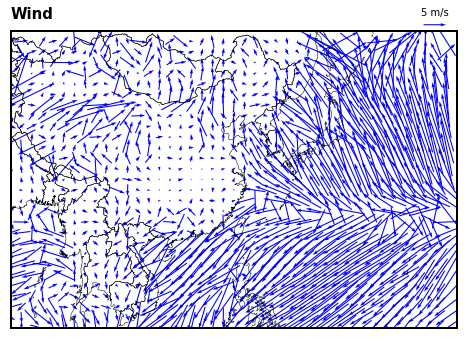

In [53]:
def plot_wind(u, v, x, y):     
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot()
    m = Basemap(llcrnrx=-3780000, llcrnry=-2520000, urcrnrx=3780000, urcrnry=2520000, projection='lcc', lat_1=30, lat_2=60, lat_0=31, lon_0=120)
    file = 'china_shapefiles_master/country1'
    m.readshapefile(file, 'states', drawbounds=True, linewidth=0.5)
    w = 2
    ax.spines['bottom'].set_linewidth(w)
    ax.spines['left'].set_linewidth(w)
    ax.spines['top'].set_linewidth(w)
    ax.spines['right'].set_linewidth(w)
    p = m.quiver(X, Y, u=u[i,:,:], v=v[i,:,:], color='blue', pivot='middle', scale=100)
    title = 'Wind'
    ax.set_title(title, loc='left', y=1.02, fontweight='semibold', fontsize=15)
    ax.quiverkey(p, X=0.95, Y=1.02, U=5, label='5 m/s')
    plt.savefig('wind.png', dpi=300)
    plt.show()
    plt.close()
    return

U = np.load('U.npy')
V = np.load('V.npy')
x = np.arange(0, 210, 5) * 36000
y = np.arange(0, 140, 5) * 36000
X, Y = np.meshgrid(x, y)
plot_wind(U, V, X, Y)

## 5. 基于Cartopy地图绘制
basemap停更，其项目已转移至Cartopy  
https://scitools.org.uk/cartopy/docs/latest/index.html

/lustre/home/acct-esehazenet/hazenet-pg3/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


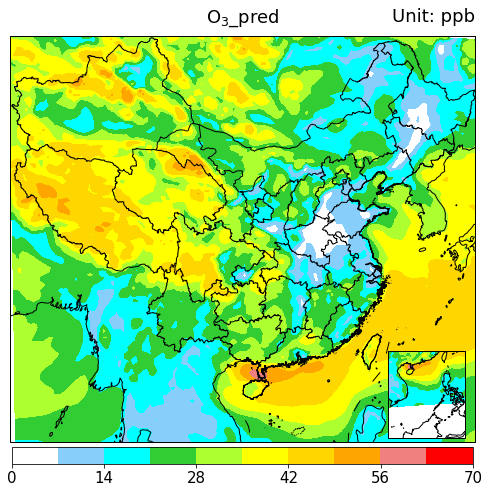

In [62]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER


def plot_map(data, time, i, max, step):       
    grid_file = Dataset('GRIDCRO2D_CHINA_36km_2016001.nc')
    lon = grid_file.variables['LON'][0,0,:,:]
    lat = grid_file.variables['LAT'][0,0,:,:]
    # Set colors
    #color_list = ('blue', 'dodgerblue', 'deepskyblue', 'lightblue','white', 'white', 'lightsalmon', 'salmon', 'red', 'firebrick')
    color_list = ('white','lightskyblue','cyan','limegreen','greenyellow','yellow','gold','orange','lightcoral','red') 
    cmap = mpl.colors.ListedColormap(color_list, name='plotmap')          
    # Set figure size
    proj = ccrs.LambertConformal(central_longitude=123.5, 
                                 central_latitude=30,
                                 false_easting=0, 
                                 false_northing=0,
                                 #standard_parallels=(46, 49),
                                 )
    fig = plt.figure(figsize=[8, 6], frameon=False)
    ax = fig.add_axes([0.08, 0.05, 0.9, 0.94], projection=proj)
    ax.grid(color='red', linestyle='-', linewidth=10)
    ax.set_extent([86.75, 130.8, 15, 49.25], crs=ccrs.PlateCarree())    
    # Add ocean, land, rivers and lakes
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    #ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    #ax.add_feature(cfeature.LAND.with_scale('50m'))
    #ax.add_feature(cfeature.RIVERS.with_scale('50m'))
    #ax.add_feature(cfeature.LAKES.with_scale('50m'))
    # *must* call draw in order to get the axis boundary used to add ticks:
    # fig.canvas.draw()
    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    china = shpreader.Reader('china_shapefiles_master/bou2_4l.dbf').geometries()
    ax.add_geometries(china, ccrs.PlateCarree(), facecolor='none', edgecolor='black',zorder=1)
    ax.set_title('$\mathregular{O_3}$_pred', loc='center', y=1.02, fontweight='normal', fontsize=18)
    ax.set_title( 'Unit: ppb', loc='right', y=1.02, fontweight='normal', fontsize=18)
    c1 = ax.contourf(lon, lat, data[time,:,:,i], levels=np.arange(0, max[i]+step[i]/100, step[i]), zorder=0, extend='neither', transform=ccrs.PlateCarree(), cmap=cmap)
    # Plot South China Sea as a subfigure
    sub_ax = fig.add_axes([0.75, 0.06, 0.2, 0.2],
                          projection=ccrs.LambertConformal(central_latitude=90,
                                                           central_longitude=115),
                         )
    # Add ocean, land, rivers and lakes    
    sub_ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
    #sub_ax.add_feature(cfeature.OCEAN.with_scale('50m'))
    #sub_ax.add_feature(cfeature.LAND.with_scale('50m'))
    #sub_ax.add_feature(cfeature.RIVERS.with_scale('50m'))
    #sub_ax.add_feature(cfeature.LAKES.with_scale('50m'))
    # Set figure extent
    sub_ax.set_extent([105, 125, 0, 25], crs=ccrs.PlateCarree())   
    c2 = sub_ax.contourf(lon, lat, data[time,:,:,i], levels=np.arange(0, max[i]+step[i]/100, step[i]), zorder=0, extend='neither',transform=ccrs.PlateCarree(), cmap=cmap)
    
    # Set colorbar
    cbposition= fig.add_axes([0.13, 0.00, 0.8, 0.04])
    cb = fig.colorbar(c1, cax=cbposition, orientation='horizontal', format='%d')
    cb.ax.tick_params(labelsize=15)
    
    fig.tight_layout()
    plt.savefig('o3_cartopy.png', bbox_inches='tight', dpi=300)  
    plt.show()
    plt.close()
    return


time = 0
i = 2
plot_map(y_pred, time, i, maxlist, steplist) 